<a href="https://colab.research.google.com/github/ArchanGhosh/GAN-/blob/master/GAN_Basics_in_Tf2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The following Notebook is made to simplify the approach towards GANS.

I tried to keep the notebook as simple as posible. If you want you can also implement different kinds of GANS using the same principles used here.

Please do star this if you think that this particular notebook helped you in anyway.

Importing the necessary Libraries and packages

In [ ]:
import os 
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import pylab as pl
import numpy as np
import random
import glob

from PIL import Image
from IPython import display
from IPython.display import Image 
from keras.layers import Input, Dense
from keras import Model

# Creating a Synthetic Dataset

With this following function I have made a synthetic data for out netowrk to learn. I have used "Normal Distribution", below I have also attached a synthetic data generator for Uniform distribution. If you want to use any other kind of distribution head over to [tf.random](https://www.tensorflow.org/api_docs/python/tf/random) and chose whatever you want and build a function with it.

(0.0, 95.0)

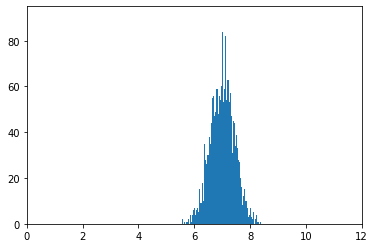

In [ ]:
def syn_dataset():
  syn_shape = (random.randint(2200,3500), 1)
  return tf.random.normal(mean=random.randint(5,12), shape=syn_shape,
                          stddev=round(random.uniform(0.15,0.5),2),
                          dtype=tf.float32)
  
counts, bin, ignored = plt.hist(syn_dataset().numpy(), 100)

axes = plt.gca()
axes.set_xlim([0, 12])
axes.set_ylim([0,95])

# Creating the Model

We have defined a simple generator and a discriminator. To make deeper models you can look in to different architectures like DC-GAN, AC-GAN, SRGAN, etc.

In [ ]:
def build_generator(input_shape):
  inputs = Input(input_shape)
  l = Dense(64, activation = keras.activations.elu)(inputs)
  l = Dense(64, activation = keras.activations.elu)(l)
  f = Dense(1)(l)

  gen = Model(inputs = inputs, outputs = f)

  return gen

In [ ]:
def build_discriminator(input_shape):
  input = Input(input_shape)
  d = Dense(32, activation = keras.activations.elu)(input)
  d = Dense(1)(d)

  dis = Model(inputs = input, outputs = d)
  return dis

In [ ]:
input_shape = (1,)

noise_shape = (random.randint(50,100),)

gene = build_generator(noise_shape)

disc = build_discriminator(input_shape)


# Defining the Loss Function

For a greater idea in GAN loss function I would suggest look into this [article](https://developers.google.com/machine-learning/gan/loss#:~:text=Send%20feedback-,Loss%20Functions,distribution%20of%20the%20real%20data.&text=minimax%20loss%3A%20The%20loss%20function,the%20paper%20that%20introduced%20GANs.)

In [ ]:
  bce = keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def disc_loss(real_output, generated_output):
  return bce(tf.ones_like(real_output), real_output) + bce(tf.zeros_like(generated_output), generated_output)

In [ ]:
def gen_loss(generated_output):
  return bce(tf.ones_like(generated_output), generated_output)

# Training out Networks, and displaying in real time what is happening.

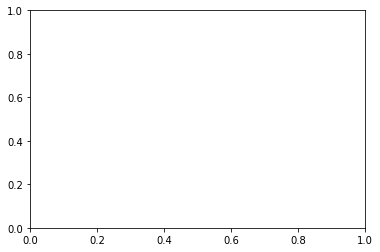

In [ ]:
if not os.path.exists("./gif/"):
    os.makedirs("./gif/")

def train():
  optimizer = keras.optimizers.Adam(1e-5)

  @tf.function
  def train_step():
    with tf.GradientTape(persistent=True) as tape:
      real_data = syn_dataset()
      noise_vector = tf.random.normal(mean = 0.0, stddev=1.0, 
                                      shape=(real_data.shape[0], 
                                             noise_shape[0]))
      fake_data = gene(noise_vector)

      d_fake_data = disc(fake_data)
      d_real_data = disc(real_data)
      d_loss_value = disc_loss(generated_output=d_fake_data, real_output=d_real_data)

      g_loss_value = gen_loss(generated_output=d_fake_data)


      d_gradients = tape.gradient(d_loss_value, disc.trainable_variables)

      g_gradients = tape.gradient(g_loss_value, gene.trainable_variables)

      del tape

      optimizer.apply_gradients(zip(d_gradients, disc.trainable_variables))
      optimizer.apply_gradients(zip(g_gradients, gene.trainable_variables))

      return real_data, fake_data, g_loss_value, d_loss_value

  fig, ax = plt.subplots()
  no=1000
  for step in range(40000):
    real_data, fake_data, g_loss_value, d_loss_value= train_step()

    if step % 200 == 0:
      print(
          "Generator Loss: ", g_loss_value.numpy(),
          " Discriminator Loss: ", d_loss_value.numpy(),
          " steps: ", step
          )
      
      ax.hist(fake_data.numpy(), 100)
      ax.hist(real_data.numpy(), 100)

      props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)

      textstr = f"step={step}"
      ax.text(
          0.05,
          0.95,
          textstr,
          transform=ax.transAxes,
          fontsize=14,
          verticalalignment="top",
          bbox=props
      )

      axes = plt.gca()
      axes.set_xlim([0, 15])
      axes.set_ylim([0, 95])
      display.display(pl.gcf())
      display.clear_output(wait=True)
      plt.savefig("./gif/{}.png".format(no))
      no=no+1
      plt.gca().clear()

train()

# Conclusion

We create a gif animation from all the snaps that were taken during the training process and then save them and display them.

In [ ]:
frames = []
imgs = glob.glob("gif/*.png")
imgs.sort()
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

 

frames[0].save('training.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

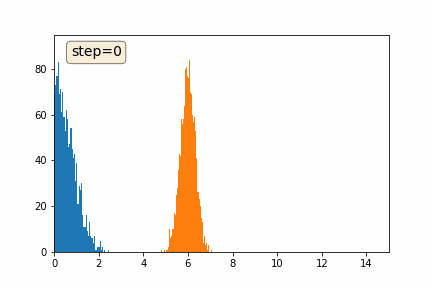

In [ ]:
Image(open('training.gif','rb').read())


**Unifrom Distribution**

As mentioned earlier this function creates a random uniform distribution. You can tweak the hyper parameters or even hardcode them to your wish.

(0.0, 100.0)

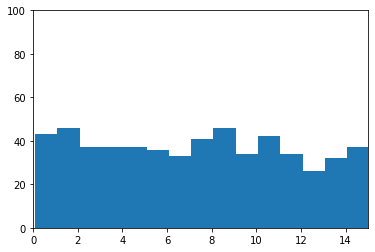

In [ ]:
def synthetic_dataset_uniform():
  syn_shape = (random.randint(2200,3600), 1)
  return tf.random.uniform(shape = syn_shape, minval= 0, maxval=500, 
                           dtype=tf.float32)
  
counts, bin, ignored = plt.hist(synthetic_dataset().numpy(), 100)

axes = plt.gca()
axes.set_xlim([0,15])
axes.set_ylim([0,100])